         latitude   longitude      acc_dist         alt    distance  \
count  117.000000  117.000000    117.000000  117.000000  117.000000   
mean    43.092456    2.255390  15125.642263  131.660759    6.422911   
std      0.019489    0.033530   8954.285117   10.609161    7.747154   
min     43.065106    2.218109     32.599109  114.047047    0.000000   
25%     43.071963    2.225834   7706.702633  123.432117    0.000000   
50%     43.094526    2.243343  14752.627401  132.422730    0.000000   
75%     43.112039    2.286702  23434.742300  135.460946   13.359768   
max     43.121847    2.317309  28434.444853  156.020256   24.517130   

        mean_dist    speed_ms   speed_kmh  
count  117.000000  117.000000  117.000000  
mean     6.143339    6.143339   22.116022  
std      3.061244    3.061244   11.020478  
min      0.000000    0.000000    0.000000  
25%      4.799088    4.799088   17.276718  
50%      6.371750    6.371750   22.938299  
75%      8.006111    8.006111   28.822001  
max     

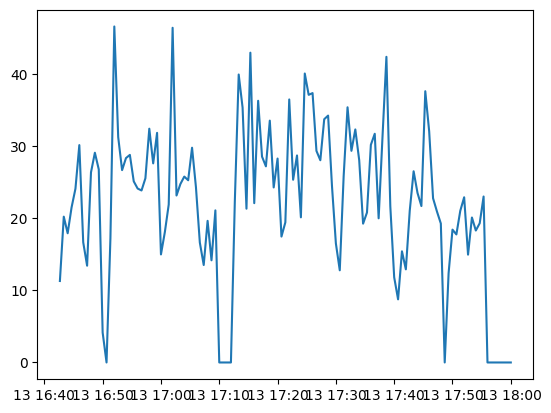

In [111]:
import sys
from datetime import datetime
import pandas as pd
import json
import matplotlib.pyplot as plt
from pprint import pprint
with open("super_cyle_20240313.json", "r") as scjson_fd:
    my_json = json.loads(scjson_fd.read())

# heads = [a["head"] for a in my_json["details"][-30:-1]]
# accs = [a["acc"] for a in my_json["details"]]
# time = [a["timestamp"] for a in my_json["details"]]
# gpsdist = [a["gpsDist"] for a in my_json["details"]]
# for t in time[:100]:
# pprint(time[0])j
# print(datetime.timestamp(datetime.now()) )
# print(datetime.datetime.fromtimestamp(1710344532620, tz = None))

df_data = []
for _d in my_json["details"]:
    df_data.append({"datetime": datetime.fromtimestamp(_d["timestamp"]//1000),
                    "latitude": _d["lat"],
                    "longitude": _d["lon"],
                    "acc_dist": _d["gpsDist"],
                    "alt": _d["alt"]})

df = pd.DataFrame.from_records(df_data, index="datetime")

df.index = pd.to_datetime(df.index)

df["distance"] = df.acc_dist.diff()
df["mean_dist"]=df.distance.rolling(10).mean()
df["speed_ms"] = df["mean_dist"]
df["speed_kmh"] = df["speed_ms"]*3.6

df = df.resample('40s').asfreq()

plt.plot(df.index, df["speed_kmh"])
print(df.describe())
